## Problem Statement: Automatically detect Lung Opacities

* **Pre-Processing, Data Visualization, EDA**
  * Exploring the given Data files, classes and images of different classes.
  * Dealing with missing values
  * Visualization of different classes
  * Analysis from the visualization of different classes.

* **Model Building**
  * Building a pneumonia detection model starting from basic CNN and then improving upon it.
  * Train the model
  * To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch. 
* **Test the Model, Fine-tuning and Repeat**
  * Test the model and report as per evaluation metrics 
  * Try different models 
  * Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them 
  * Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

* May 23/24 - Project approach, and responsibilities sharing
* May 30/31 - Milestone 1: EDA and Pre-processing
* Jun 06/07 - Milestone 1: Modelling, Accuracy and Generalization, **Interim Report Submission**
* Jun 13/14 - Milestone 2: Interim Report Submission, Model Evaluation, Performance Tuning
* Jun 20/21 - Milestone 2: Validation of Final Report
* Jun 27/28 - Milestone 2: Presentation to the Mentor
* Jul 04/05 - **Final Report Submission** 





## Goal: 
Detect Lung opacities on a chest radiograph


## Challenges: 
While common, accurately diagnosing pneumonia is challenging as it requires a review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post-radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.

## Sample Images of Lung Opacities

1. Normal Image



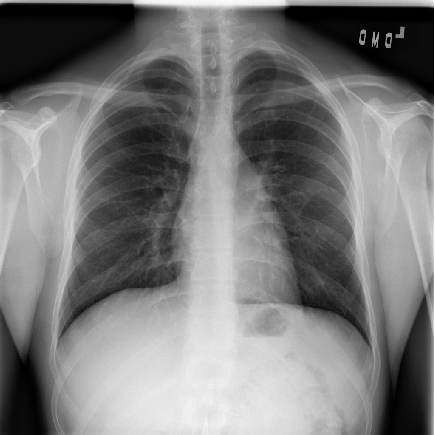

In X-ray, tissues with sparse material such as lungs which are full of air, do not absorb the X-rays and therefore appear black in the image. Dense tissues such as bones absorb X-rays and appear white.



*   Black - Air
*   White - Bones
*   Grey - Tissue


2.  Image with Lung opacities

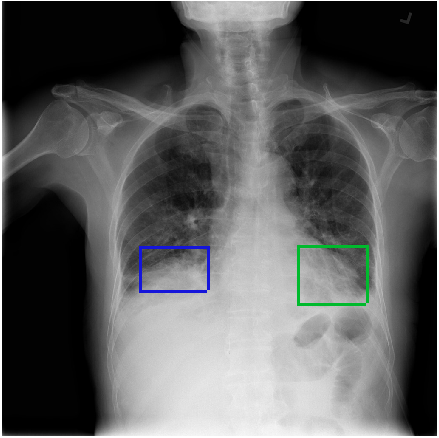

Usually, lungs are full of air. When someone has pneumonia, the air in the lungs is replaced by other material – fluids, bacteria, immune system cells, etc. That’s why areas of opacities are areas that are grey but should be more black. When we see them we understand that the lung tissue in that area is probably not healthy.

What makes the problem more challenging is that not all opacities show Pneumonia symptoms. See example of a lung that is not normal because it has opacities that are nodular, such types of opacities are not associated with Pneumonia. Pneumonia-related opacities look more like fuzzy clouds Image 1.

3. Lung Nodules and Masses

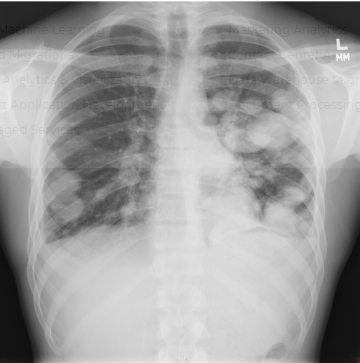

## 1. Preprocessing, Data Visualization, EDA

In [0]:
#Import all necessary packages
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dataset: data_class

In [0]:
data_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_detailed_class_info.csv/stage_2_detailed_class_info.csv')
print(data_class.shape)
data_class.head()

(30227, 2)


,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity



* No Lung Opacity/ Not Normal: Not Normal, No Pneumonia
* Normal: No Pneumonia
* Lung Opacity: Pneumonia

In [0]:
data_class['patientId'].value_counts()

31764d54-ea3b-434f-bae2-8c579ed13799    4
0d5bc737-03de-4bb8-98a1-45b7180c3e0f    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
                                       ..
18aef831-82d6-4847-953e-9c06f1e2f5fe    1
2f0f42a4-dc05-477c-91d2-fd7228d4844b    1
c7ece649-cbd6-4c86-8dfb-90096d640fb2    1
3f33bafd-eb7a-41c0-b888-b1269f241c9c    1
441f3b0e-190b-4a7a-8d49-e4ba5f2983f8    1
Name: patientId, Length: 26684, dtype: int64


* 1 Patient id can have multiple bounding boxes > Lung opacity > Pneumonia

Dataset: data_labels

In [0]:
data_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_train_labels.csv/stage_2_train_labels.csv')
print(data_labels.shape)
data_labels.head()

(30227, 6)


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


* Target 0 : No Pneumonia
* Target 1 : Pneumonia
* All rows with x, y, height, width as NaN means they dont have pneumonia while the rest have more than 1 area of pneumonia detected.

In [0]:
data = pd.concat([data_labels, data_class], axis = 1)
data = data.T.drop_duplicates().T #this is to check if any columns are duplicates and drop them accordingly
print(data.shape)
data.head()

(30227, 7)


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity


In [0]:
data.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

Null data are the ones who do not have Pneumonia, hence don't have bounding box coordinates.

In [0]:
data[data['Target'] == 1]

,patientId,x,y,width,height,Target,class
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
8,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,695,575,162,137,1,Lung Opacity
14,00aecb01-a116-45a2-956c-08d2fa55433f,288,322,94,135,1,Lung Opacity
...,...,...,...,...,...,...,...
30220,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,316,504,179,273,1,Lung Opacity
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609,464,240,284,1,Lung Opacity
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185,298,228,379,1,Lung Opacity
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570,393,261,345,1,Lung Opacity


These show all Pneumonia positive cases have Target '1'.

In [0]:
data['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [0]:
round((data['class'].value_counts()/len(data.index) * 100),2)

No Lung Opacity / Not Normal    39.11
Lung Opacity                    31.61
Normal                          29.28
Name: class, dtype: float64

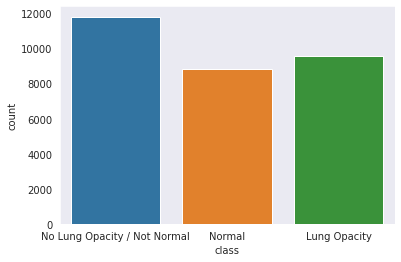

In [0]:
sns.countplot(data['class'])

### Viewing the DICOM Image

In [0]:
#!pip install pydicom
import pydicom, glob, pylab
import numpy as np

patientId = data['patientId'][0] #No lung opacity/ Not normal
dcm_file = '/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)
print(dcm_data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [0]:
img = dcm_data.pixel_array
print(type(img))
print(img.dtype)
print(img.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


## Explore DICOM Images

In [0]:
import os
train_img_path = os.listdir('/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_train_images')
test_img_path = os.listdir('/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_test_images')

print("No. of training images:", len(train_img_path))
print("No. of testing images:", len(test_img_path))

No. of training images: 26684
No. of testing images: 3000


Each training image can have many bounding boxes hence no. of training images are less i.e it is equal to no. of unqiue patientIds

No Lung Opacity/Not Normal


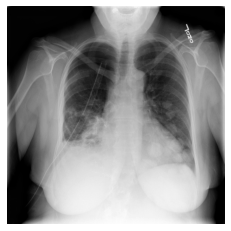

In [0]:
pylab.imshow(img, cmap = pylab.cm.gist_gray)
pylab.axis('off')
print("No Lung Opacity/Not Normal")

<class 'numpy.ndarray'>
uint8
(1024, 1024)
Normal


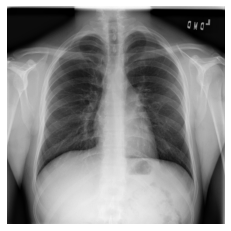

In [0]:
patientId = data['patientId'][3] #Normal
dcm_file = '/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

img = dcm_data.pixel_array
print(type(img))
print(img.dtype)
print(img.shape)

pylab.imshow(img, cmap = pylab.cm.gist_gray)
pylab.axis('off')
print("Normal")

<class 'numpy.ndarray'>
uint8
(1024, 1024)
Lung Opacity -> Pneumonia


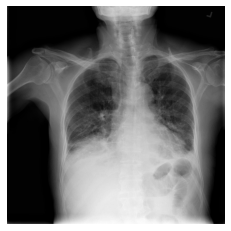

In [0]:
patientId = data['patientId'][8] #Lung Opacity
dcm_file = '/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

img = dcm_data.pixel_array
print(type(img))
print(img.dtype)
print(img.shape)

pylab.imshow(img, cmap = pylab.cm.gist_gray)
pylab.axis('off')
print("Lung Opacity -> Pneumonia")